# Project: European Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Hint**: In this Project we'll be analyzing data associated with European Soccer Database.
It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

> **Trends**: We'll be interested in the following: 
 <li>What is the effect of playing home over away games?
 <li>What is the most leagues scoring goals over the time period?
 <li>What are the top ten players with the best ranking over the time period?
 <li>What are the most common attributes of the players with the best ranking over the time period?
 <li>What are the best teams over the time period?

In [1]:
# Importing all of the packages that we plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

#### It's the time for Gathering, Assessing, and Cleaning the data before we get our Findings

## Loading the Data

In [2]:
## Using Pandas to load all required data

#Loading Country file
df_country = pd.read_csv('Country.csv')

#Loading League file
df_league = pd.read_csv('League.csv')

#Loading Match file
df_match = pd.read_csv('Match.csv')

#Loading Player file
df_player = pd.read_csv('Player.csv')

#Loading Player's Attributes file
df_player_attr = pd.read_csv('Player_Attributes.csv')

#Loading Team file
df_team = pd.read_csv('Team.csv')

#Loading Team's Attributes file
df_team_attr = pd.read_csv('Team_Attributes.csv')

### Data Assessing
####  It's time to check the data before applying cleaning 


In [3]:
# Assessing the Country file
df_country.head(1)

,id,name
0,1,Belgium


In [4]:
# Inspecting the Shape of Country file
df_country.shape

(11, 2)

In [7]:
# Assessing the League file
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [8]:
# Inspecting the Shape of League file
df_league.shape

(11, 3)

In [9]:
# Assessing the Match file
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [10]:
# Inspecting the Shape of Match file
df_match.shape

(25979, 115)

In [11]:
# Inspecting the data types of Match file
df_match.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

In [12]:
# Assessing the Player file
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [13]:
# Assessing the Player's Attribute file
df_player_attr.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [14]:
# Inspecting the Shape of Player's Attribute file
df_player_attr.shape

(183978, 42)

In [15]:
# Inspecting the data types of Player's Attribute file
df_player_attr.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [16]:
# Assessing the Team file
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [17]:
# Assessing the Team's Attribute file
df_team_attr.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [18]:
# Inspecting the Shape of Team's Attribute file
df_team_attr.shape

(1458, 25)

In [19]:
# Inspecting the data types of Team's Attribute file
df_team_attr.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

### Data Cleaning
#### After Gathering and Assessing the  data it's time to treat and clean the data to get into our findings

<li> 1-Trying to minimize the data files by merging the common data files
<li> 2-Renaming when necessary
<li> 3-Dropping the unnecessary columns
<li> 4-Dealing with the missing items
<li> 5-Merging columns when necessary
    

### Trying to minimize the data files by merging the common data files

In [20]:
# We notice we have common features in the Team and Team's Attributes data sets, let's merge those into one data set
df_team_edited = df_team.merge(df_team_attr, left_on=['team_api_id'], right_on=['team_api_id'], how= 'outer')
df_team_edited.head(1)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485.0,673.0,2010-02-22 00:00:00,45.0,Balanced,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover


In [21]:
# Saving the Team edited file
df_team_edited.to_csv('team_edited.csv',index= False)

In [22]:
# We notice we have common features in the Player and Player's Attributes data sets, let's merge those into one data set
df_player_edited = df_player.merge(df_player_attr, left_on=['player_api_id'], right_on=['player_api_id'], how= 'outer')
df_player_edited.head(1)

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [23]:
# Saving the Player edited file
df_player_edited.to_csv('player_edited.csv',index= False)

In [24]:
# We notice we have common features in the Country, League and Match data sets, let's merge those into one data set
# Renaming the country's label in the country file -from (name label) to (country label)- to avoid repeating the names of the columns in the data frame
df_country.rename(columns={'name' : 'country'}, inplace= True)
df_country.head(1)

,id,country
0,1,Belgium


In [25]:
# Merging League file with Country file
df_league_edited1 = df_league.merge(df_country, left_on='id',  right_on='id', how='outer')
df_league_edited1.head(1)

,id,country_id,name,country
0,1,1,Belgium Jupiler League,Belgium


In [26]:
# Merging League file with Match file
df_league_edited2 = df_league_edited1.merge(df_match, left_on=['country_id'] ,right_on=['country_id'] ,how= 'outer')
df_league_edited2.head(1)

,id_x,country_id,name,country,id_y,league_id,season,stage,date,match_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,Belgium Jupiler League,Belgium,1,1,2008/2009,1,2008-08-17 00:00:00,492473,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [27]:
# Saving the League edited file
df_league_edited2.to_csv('league_edited.csv',index= False)

### Dropping the unnecessary columns

In [28]:
# Loading Team data to perfom cleaning
df_team = pd.read_csv('team_edited.csv')
df_team.head(1)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485.0,673.0,2010-02-22 00:00:00,45.0,Balanced,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover


In [29]:
# Dropping unnecessary columns of Team Data
df_team.drop(df_team.iloc[ :, 7:], axis=1, inplace=True)
df_team.drop(['id_x', 'team_fifa_api_id_x', 'team_fifa_api_id_y' ,'id_y'], axis=1, inplace=True)

In [30]:
# Inspecting the Team Data file after Dropping process
df_team.head(1)

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN


### Dealing with missing values

In [31]:
# Inspecting the missing values in Team Data
df_team.isnull().sum()

team_api_id        0
team_long_name     0
team_short_name    0
dtype: int64

In [32]:
# Deleting any missing values in Team Data
df_team[df_team.isnull().any(axis=1)]
df_team.dropna(axis=0, inplace=True)
df_team.isnull().sum()

team_api_id        0
team_long_name     0
team_short_name    0
dtype: int64

In [33]:
# saving the previous steps 
df_team.to_csv('team_edited.csv', index = False)

In [34]:
# Repeating the previous steps for Player Data and League Data 
# Firstly, repeat the previous steps for Player Data
df_player = pd.read_csv('player_edited.csv')
df_player.head(1)

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [35]:
# Dropping unnecessary columns of Palyer Data file
df_player.drop(['id_x', 'player_api_id', 'player_fifa_api_id_x','player_fifa_api_id_y', 'id_y'], axis=1, inplace=True)

In [36]:
# Inspecting the missing values in Player Data file
df_player.isnull().sum()

player_name               0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking             

In [37]:
# Deleting unnecessary features with missing value
df_player.drop(['attacking_work_rate', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'vision','sliding_tackle'], axis=1, inplace= True)

In [38]:
# Deleting missing values
df_player.isnull().sum()
df_player.dropna(axis=0, inplace= True)

In [39]:
# saving the previous steps 
df_player.to_csv('player_edited.csv', index = False)

In [40]:
# Secondly, repeat the previous steps for Player Data
df_league = pd.read_csv('league_edited.csv')
df_league.head(1)

,id_x,country_id,name,country,id_y,league_id,season,stage,date,match_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,Belgium Jupiler League,Belgium,1,1,2008/2009,1,2008-08-17 00:00:00,492473,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [41]:
# Deleting unnecessary features for Team data
df_league.info()
df_league.drop(['id_x', 'country_id', 'id_y', 'league_id','season', 'match_api_id'], axis=1, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 118 entries, id_x to BSA
dtypes: float64(96), int64(10), object(12)
memory usage: 23.4+ MB


In [42]:
# Deleting missing values
df_league.isnull().sum()
df_league.dropna(axis=1, inplace=True)

In [43]:
# saving the previous steps 
df_league.to_csv('league_edited.csv', index = False)

### Inspecting duplicated values

In [44]:
# Inspecting duplicated values in Team Data
df_team.duplicated().sum()

1170

In [45]:
# Removing duplicated values in Team Data
df_team.drop_duplicates(inplace=True,ignore_index=False)
df_team.duplicated().sum()

0

In [46]:
# Inspecting duplicated values in League Data
df_league.duplicated().sum()

0

In [47]:
# Inspecting duplicated values in Players Data
df_player.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

>  After wrangling the data,  it's time for answering the most common questions through Exploratory Data Analysis

###  Question 1 (What is the effect of playing home over away games?)

> One of the most common questions in the soccer world, what is the effect for any team playing home over away stadium?
Any champion team, they have fan support at home and the probability of winning a game is more at home than away.
we're going to get some stats to prove the fact of this concept.

In [48]:
# loading data of European leagues to answer the question
df_league = pd.read_csv('league_edited.csv')
df_league.head(1)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1


### First, we're going to describe the variables and checking its distribution.

In [49]:
# Describe the data of home teams goals
df_league['home_team_goal'].describe()

count    25979.000000
mean         1.544594
std          1.297158
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: home_team_goal, dtype: float64

### As we can see in the above-descriptive  statistics, the outlier value is the max team goals per match and it rarely occurs and it doesn't affect the data analysis eventually we'll use the subtracted value between home and away goals. other than that, everything is okay

In [50]:
# Describe the data of away teams goals
df_league['away_team_goal'].describe()

count    25979.000000
mean         1.160938
std          1.142110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: away_team_goal, dtype: float64

### The same conclusion here for Away Team Goals per match compared with home Team Goals descriptive statistics

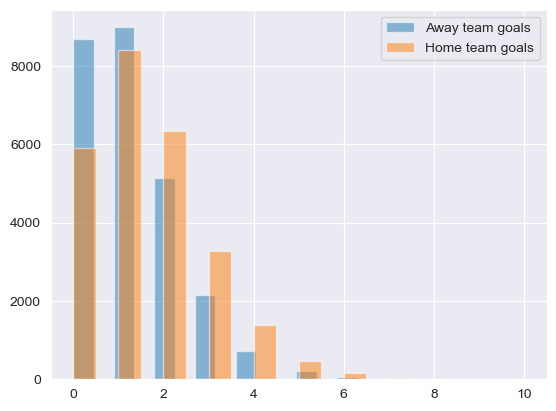

In [51]:
# Checking the distribution of home and away teams goals
df_league['away_team_goal'].hist(alpha=0.5, bins=20, label='Away team goals')
df_league['home_team_goal'].hist(alpha=0.5, bins=20, label='Home team goals')
plt.legend();

### The above graph describes the Statistics Comparison between Home and Away Goals per match.
> for example, as we can see the proportion of nonscoring goals for the away team is more than the home team.

### Second, Visualization of Data Analysis

In [52]:
# Using the data to know home victory vs home loss
# Getting the number of home victories for all European leagues over the period
df_home_victory = df_league.query('home_team_goal > away_team_goal')
df_home_victory.shape[0]

11917

In [53]:
# Getting the number of home loses for all European leagues over the period
df_home_lose = df_league.query('home_team_goal < away_team_goal')
df_home_lose.shape[0]

7466

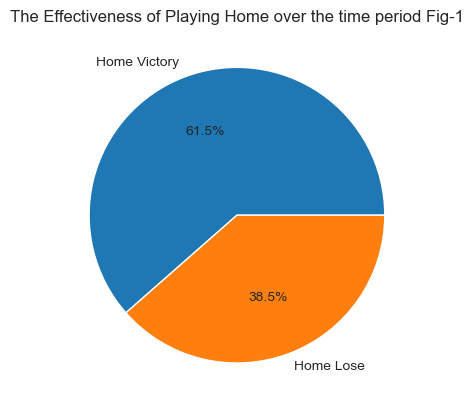

In [54]:
# Visualize analyzed data
values = [df_home_victory.shape[0],df_home_lose.shape[0]]
plt.pie(values ,labels=['Home Victory', 'Home Lose'] ,autopct='%1.1f%%');
plt.title('The Effectiveness of Playing Home over the time period Fig-1');

### The figure shows the percentage of the Home Teams victory over The Away Teams.
> As we've guessed the percentage of Home Team Victory is a lot more than Away Team.

###  Question 2  (What is the most leagues scoring goals over the time period?)

> Another question can be answered by this useful data.
The most-scoring league is an indicator of the most powerful league, every great player wants to play in such a league with high goals to increase his record.

> We're going to get the leagues that score more goals

In [55]:
# loading data of European leagues to answer the question
df_league = pd.read_csv('league_edited.csv')
df_league.head(1)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1


In [56]:
# Create a new column to get total goals of every single game for all leagues 
df_league['total_goal'] = df_league['home_team_goal'] + df_league['away_team_goal']
df_league.head(1)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goal
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1,2


### First, we're going to describe the variables and checking its distribution.

In [57]:
# Describe the data of total goals for home and away teams per match
df_league['total_goal'].describe()

count    25979.000000
mean         2.705531
std          1.672456
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: total_goal, dtype: float64

### As we can see in the above- statistics, the outlier value is the max of summation goals per match and it rarely occurs and it doesn't affect the data analysis eventually we'll use the summation value for home and away goals. other than that, everything is okay

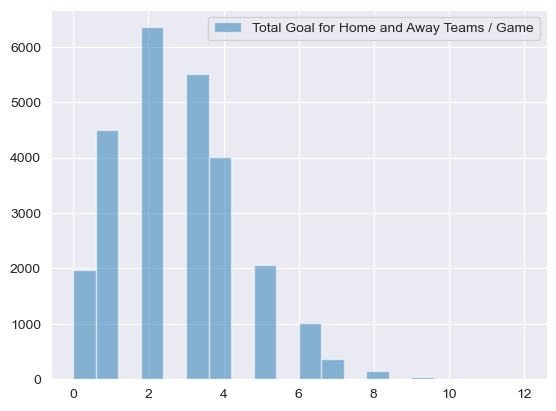

In [58]:
# Checking the distribution of total goals for home and away teams per match
df_league['total_goal'].hist(alpha=0.5, bins=20, label='Total Goal for Home and Away Teams / Game')
plt.legend();

### The above graph describes the Statistics for Summation Goals per match.
> for example, as we can see the mean of summation goals per match is approximately 2.5 goals over the time period.

### Second, Visualization of Data Analysis

In [59]:
# filtering by league name and getting a summation of goals of the filtered league
df_most_goals = df_league.groupby('name').sum()
df_most_goals

,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goal
name,,,,,,
Belgium Jupiler League,27252,23864908,23864908,2781,2060,4841
England Premier League,59280,27792516,27792516,4715,3525,8240
France Ligue 1,59280,29817232,29817232,4265,3162,7427
Germany 1. Bundesliga,42840,22473252,22473252,3982,3121,7103
Italy Serie A,58654,31212831,31215792,4528,3367,7895
Netherlands Eredivisie,42840,22476040,22476040,4357,3185,7542
Poland Ekstraklasa,29760,15142215,15142215,2678,1978,4656
Portugal Liga ZON Sagres,33030,28630043,28630043,2890,2311,5201
Scotland Premier League,35568,16654496,16654214,2607,2197,4804


In [60]:
# Sorting values by the league has the most goals
values = df_most_goals['total_goal'].copy()
values.sort_values(ascending=False, inplace= True)
values
index = values.index

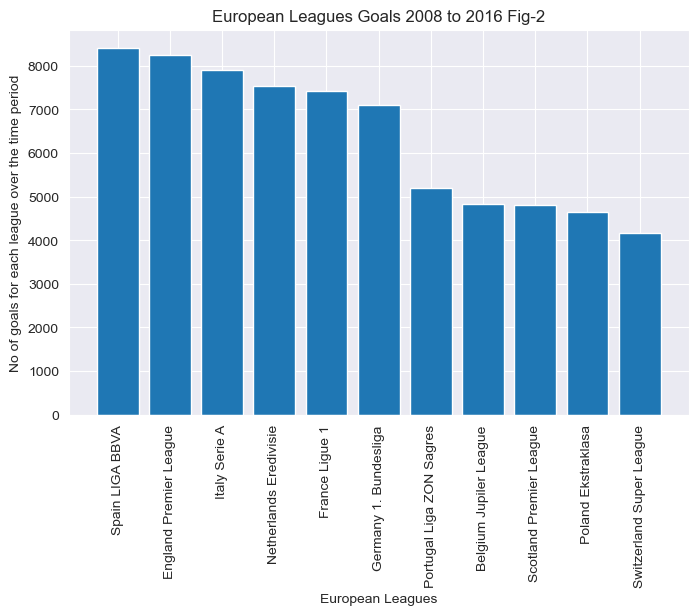

In [61]:
# Visualize analyzed data
plt.subplots(figsize= (8,5))
plt.bar(index ,values);
plt.title('European Leagues Goals 2008 to 2016 Fig-2')
plt.ylabel('No of goals for each league over the time period')
plt.xlabel('European Leagues')
plt.xticks(rotation=90)
plt.show()

### The figure orders the league that has the most goals
> As we observe, Spain Liga BBVA is the most league-scoring goals from 2008 to 2016, followed by the English Premier League, and so on.

### Question 3 (What are the top ten players with the best ranking over the time period?)


> One of my favorite question, for any league, any cup and any period.
<br>Comparison between the greatest palyer at any time is one of many things that makes fans love this sport.

> We're going to get the top ten players over the time period.

In [62]:
# loading data of Players in European Leagues to answer the question
df_player = pd.read_csv('player_edited.csv')
df_player.head(1)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,defensive_work_rate,crossing,...,interceptions,positioning,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,49.0,...,70.0,45.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0


In [63]:
# Using pandas to clean the birthday column to filter players when the name is similar
df_player['birthday'] = df_player['birthday'].apply(lambda x : x.split(' ')[0])
df_player['birthday']

0         1992-02-29
1         1992-02-29
2         1992-02-29
3         1992-02-29
4         1992-02-29
             ...    
183137    1982-06-05
183138    1982-06-05
183139    1982-06-05
183140    1982-06-05
183141    1982-06-05
Name: birthday, Length: 183142, dtype: object

### First, we're going to describe the variables and checking its distribution.

In [64]:
# Describe the data of overall rating for players
df_player['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

### The above descriptive statistics show the overall rating for European Leagues Players. The minimum rating is 33, the Mean is 68.6 and the max rating is 94

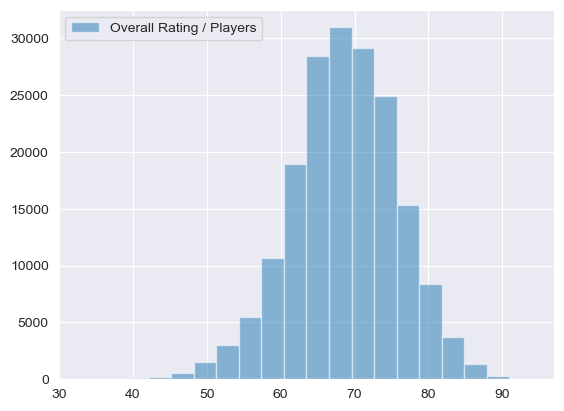

In [65]:
# Checking the distribution of overall rating for players
df_player['overall_rating'].hist(alpha=0.5, bins=20, label='Overall Rating / Players')
plt.legend();

### The above graph describes the previous Statistics for the overall rating of The European Leagues Players

### Second, Visualization of Data Analysis

In [66]:
# Filtering by names and birthdays to get the top ten rating players
df_top_rating = df_player.groupby(['player_name', 'birthday'])['overall_rating'].mean()
df_top_rating

player_name                  birthday  
Aaron Appindangoye           1992-02-29    63.600000
Aaron Cresswell              1989-12-15    66.969697
Aaron Doran                  1991-05-13    67.000000
Aaron Galindo                1982-05-08    69.086957
Aaron Hughes                 1979-11-08    73.240000
                                             ...    
Zsolt Low                    1979-04-29    67.571429
Zurab Khizanishvili          1981-10-06    70.750000
Zvjezdan Misimovic           1982-06-05    80.000000
de Oliveira Cleber Monteiro  1980-05-23    66.111111
dos Santos Fabio Junior      1982-10-06    66.750000
Name: overall_rating, Length: 11060, dtype: float64

In [69]:
# Filtering the Top 10 Players based on ratings from 2008 to 2016
top_10  = np.argsort(df_top_rating)[::-1][:10]
top_10_rating = df_top_rating[top_10]
top_10_rating.index

MultiIndex([(      'Lionel Messi', '1987-06-24'),
            ( 'Cristiano Ronaldo', '1985-02-05'),
            (     'Franck Ribery', '1983-04-07'),
            (    'Andres Iniesta', '1984-05-11'),
            ('Zlatan Ibrahimovic', '1981-10-03'),
            (      'Arjen Robben', '1984-01-23'),
            (    'Xavi Hernandez', '1980-01-25'),
            (      'Wayne Rooney', '1985-10-24'),
            (     'Iker Casillas', '1981-05-20'),
            (      'Philipp Lahm', '1983-11-11')],
           names=['player_name', 'birthday'])

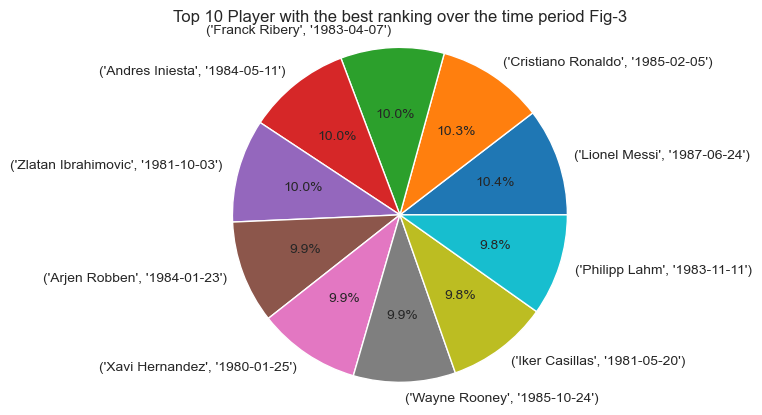

In [68]:
# Visualize analyzed data
plt.pie(top_10_rating ,labels=top_10_rating.index ,autopct='%1.1f%%');
plt.title('Top 10 Player with the best ranking over the time period Fig-3');
plt.axis('equal');
plt.show();


### The pie chart shows the percentage of the mean rating form the top 10 players over the time period.
> As we observe, Lionel Messi is 1st and Philipp Lahm is the 10th

###  Question 4 (What are tho most common attributes of the players with the best ranking over the time period?)


> How beautiful for knowing the most common attributes of the top ten players.
<br> We can use those attributes to improve the ranking of other players

> We're going to get the top ten players' attributes over the time period.

In [67]:
# loading data of Players in European Leagues to answer the question
df_player = pd.read_csv('player_edited.csv')
df_player.head(1)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,defensive_work_rate,crossing,...,interceptions,positioning,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,49.0,...,70.0,45.0,48.0,65.0,69.0,6.0,11.0,10.0,8.0,8.0


### First, we're going to describe the variables and checking its distribution.

In [68]:
# Describe the data for players' attributes
df_player.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,...,interceptions,positioning,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,181.875925,168.769463,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,59.175154,49.380950,...,52.009271,55.786504,55.003986,46.772242,50.351257,14.704393,16.063612,20.998362,16.132154,16.441439
std,6.394896,15.088820,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,17.744688,17.831746,...,19.450133,18.448292,15.546519,21.227667,21.483706,16.865467,15.867382,21.452980,16.099175,17.198155
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,52.000000,36.000000,...,34.000000,45.000000,45.000000,25.000000,29.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,64.000000,50.000000,...,57.000000,60.000000,57.000000,50.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,72.000000,63.000000,...,68.000000,69.000000,67.000000,66.000000,69.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,97.000000,97.000000,...,96.000000,96.000000,96.000000,96.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### The above descriptive statistics show the rating of Players' Attributes for European Leagues Players. This is a rating based on a player's position or performance, so you might see a rating as low as 1 or as high as 97.

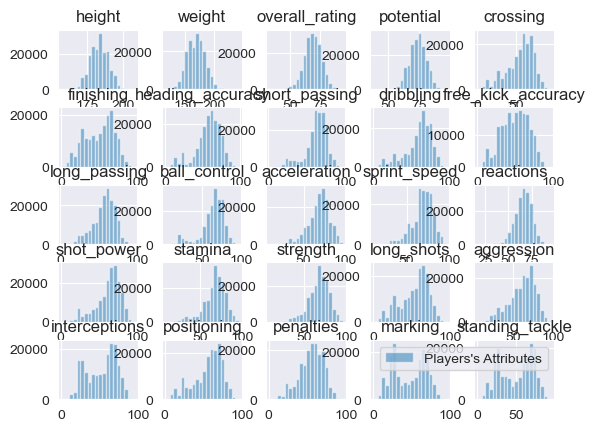

In [69]:
# Checking the distribution of the data for players' attributes
df_player.iloc[: , 2: -5:].hist(alpha=0.5, bins=20, label='Players\'s Attributes')
plt.legend();

### The above graphs describe the previous rating of Players' Attributes for European Leagues Players.

### Second, Visualization of Data Analysis

In [70]:
# Filtering by the names of the top ten players and the mean of their attributes
df_top_attr= df_player.query('player_name == ["Alessio Cerci", "Claudio Marchisio", "Roberto Pereyra", "Michael Bradley", "Phillippe Mexes", "Yacine Brahimi", "Aurelien Chedjou", "Adel Taarabt", "Zdravko Kuzmanovic", "Thierry Henry"]')
common_attr = df_top_attr.mean()
common_attr

C:\Users\Hamam\AppData\Local\Temp\ipykernel_13700\2825317333.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  common_attr = df_top_attr.mean()


height                183.069770
weight                171.835249
overall_rating         77.733716
potential              81.503831
crossing               68.687739
finishing              63.762452
heading_accuracy       62.877395
short_passing          76.963602
dribbling              75.630268
free_kick_accuracy     65.913793
long_passing           71.783525
ball_control           78.620690
acceleration           75.568966
sprint_speed           74.340996
reactions              74.628352
shot_power             75.036398
stamina                72.720307
strength               72.076628
long_shots             70.013410
aggression             69.747126
interceptions          60.597701
positioning            68.174330
penalties              68.565134
marking                51.923372
standing_tackle        58.492337
gk_diving               8.109195
gk_handling            11.772031
gk_kicking             14.795019
gk_positioning         10.199234
gk_reflexes            10.743295
dtype: flo

In [71]:
# Etracting the requried attributes and ignoring unnecessary ones
common_attr = df_top_attr.mean()[3: -5]

C:\Users\Hamam\AppData\Local\Temp\ipykernel_13700\842501695.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  common_attr = df_top_attr.mean()[3: -5]


In [72]:
# Sorting the data by the mean of the most common attributes before plotting
common_attr.sort_values(ascending=False, inplace= True)
common_attr

potential             81.503831
ball_control          78.620690
short_passing         76.963602
dribbling             75.630268
acceleration          75.568966
shot_power            75.036398
reactions             74.628352
sprint_speed          74.340996
stamina               72.720307
strength              72.076628
long_passing          71.783525
long_shots            70.013410
aggression            69.747126
crossing              68.687739
penalties             68.565134
positioning           68.174330
free_kick_accuracy    65.913793
finishing             63.762452
heading_accuracy      62.877395
interceptions         60.597701
standing_tackle       58.492337
marking               51.923372
dtype: float64

In [74]:
# Finding explode for pie chart  
ind = list(common_attr)
explode = []
for x in ind :
    if x > 80 :
        explode.append(0.4)
    elif x > 78 :
        explode.append(0.2)
    else:
        explode.append(0)

explode

[0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

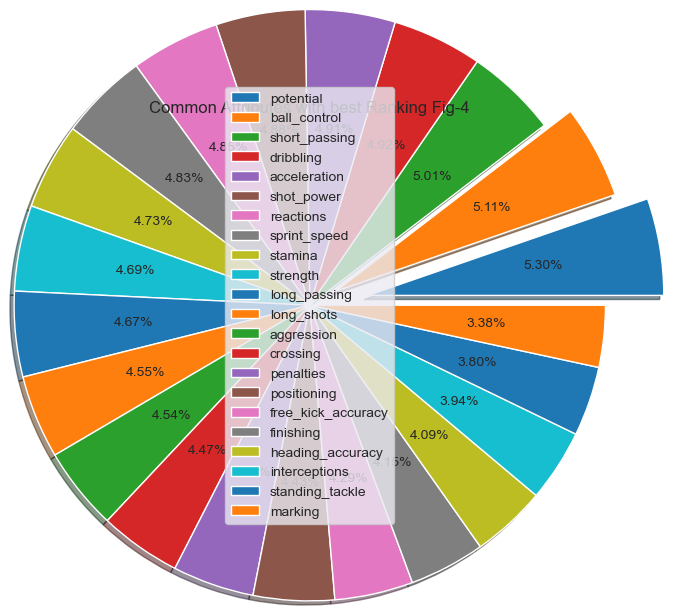

In [75]:
# Visualize analyzed data
plt.title("Common Attributes with best Ranking Fig-4", loc = 'center')
plt.pie(common_attr,explode = explode, autopct='%1.2f%%', shadow=True, radius=2)
plt.legend(common_attr.index, loc="center")
plt.show()

### The pie chart shows the Common Players' Attributes rating for The Top 10 rating Players
> As we observe, The potentail is the most common attribute for The top players followed by ball control attribute and so on.

### Question 5 (What teams improved the most over the time period? )


> One of the most logical questions in soccer. What teams improved the most over the time period?
<br> We can get the answer by analyzing the teams scoring the most goals and the teams that got the most points over the period.

In [76]:
# loading data of European Leagues to answer the question
df_league = pd.read_csv('league_edited.csv')
df_league.head(1)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1


In [77]:
# Creating a new column with home and away team points 
df_league['home_team_points'] = df_league['home_team_goal'] - df_league['away_team_goal']

In [78]:
df_league['away_team_points'] = df_league['away_team_goal'] - df_league['home_team_goal']

In [79]:
# Using a function to set 1 point with team draw, zero points when team is lost and three points when team is won
# Applying this function for home and away teams
def stats(home_team_points):
    if home_team_points == 0:
        stat = 1
    elif home_team_points > 0:
        stat = 3
    else:
        stat = 0
    return stat

In [80]:
df_league['home_team_points'] = df_league['home_team_points'].apply(lambda x: stats(x))

In [81]:
def stats(away_team_points):
    if away_team_points == 0:
        stat = 1
    elif away_team_points > 0:
        stat = 3
    else:
        stat = 0
    return stat

In [82]:
df_league['away_team_points'] = df_league['away_team_points'].apply(lambda x: stats(x))

In [83]:
# Inspecting the data frame after the previous steps
df_league.head(5)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_points,away_team_points
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1,1,1
1,Belgium Jupiler League,Belgium,1,2008-08-16 00:00:00,10000,9994,0,0,1,1
2,Belgium Jupiler League,Belgium,1,2008-08-16 00:00:00,9984,8635,0,3,0,3
3,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9991,9998,5,0,3,0
4,Belgium Jupiler League,Belgium,1,2008-08-16 00:00:00,7947,9985,1,3,0,3


In [84]:
# loading data of European teams to get the names of teams
df_team = pd.read_csv('team_edited.csv')
df_team.head(1)

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN


In [85]:
# Creating a new data frame a copy of the original to get the name of home teams
df_team_home = df_team.copy()

In [86]:
# Renaming the column in the team file that will be merged with the column in the league file to get matched by the same name
df_team_home.rename(columns={'team_api_id' : 'home_team_api_id', 'team_long_name' : 'home_team_long_name', 'team_short_name': 'home_team_short_name'}, inplace= True)
df_team_home.head(1)

,home_team_api_id,home_team_long_name,home_team_short_name
0,9987,KRC Genk,GEN


In [87]:
# Applying the merging
df_team_pro = df_league.merge(df_team_home, left_on= 'home_team_api_id', right_on = 'home_team_api_id', how='outer')

In [88]:
# Repeating the same previous steps for away team
df_team_away = df_team.copy()
df_team_away.rename(columns={'team_api_id' : 'away_team_api_id', 'team_long_name' : 'away_team_long_name', 'team_short_name': 'away_team_short_name'}, inplace= True)
df_team_away.head(1)

,away_team_api_id,away_team_long_name,away_team_short_name
0,9987,KRC Genk,GEN


In [89]:
df_team_pro_edited = df_team_pro.merge(df_team_away, left_on= 'away_team_api_id', right_on = 'away_team_api_id', how='outer')

In [90]:
df_team_pro_edited.head(1)

,name,country,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_points,away_team_points,home_team_long_name,home_team_short_name,away_team_long_name,away_team_short_name
0,Belgium Jupiler League,Belgium,1,2008-08-17 00:00:00,9987,9993,1,1,1,1,KRC Genk,GEN,Beerschot AC,BAC


### First, we're going to describe the variables and checking its distribution.

In [91]:
# Describe the data of home team points
df_team_pro_edited['home_team_points'].describe()

count    783373.000000
mean          1.638225
std           1.313266
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: home_team_points, dtype: float64

### The above descriptive statistics show the Home Team points over the time period. 3 points for victory is the maximum points , zero points for lose is the minimum points and 1.6 points per match is the mean.

In [92]:
# Describe the data of away team points
df_team_pro_edited['away_team_points'].describe()

count    783373.000000
mean          1.108661
std           1.261201
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: away_team_points, dtype: float64

### The above descriptive statistics show the Away Team points over the time period. 3 points for victory is the maximum points , zero points for lose is the minimum points and 1.1 points per match is the mean.

In [93]:
# Describe the data of home team goals
df_team_pro_edited['home_team_goal'].describe()

count    783373.000000
mean          1.552868
std           1.300841
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: home_team_goal, dtype: float64

### The above descriptive statistics show the Home Team goals over the time period. 10 goals per game is the maximum value and 1.5 goals per game is the mean

In [94]:
# Describe the data of away team goals
df_team_pro_edited['away_team_goal'].describe()

count    783373.000000
mean          1.160433
std           1.141608
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: away_team_goal, dtype: float64

### The above descriptive statistics show the Away Team goals over the time period. 9 goals per game is the maximum value and 1.2 goals per game is the mean

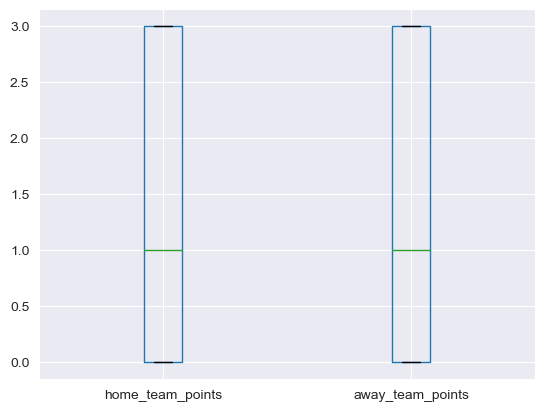

In [95]:
# Checking the distribution of the data for teams' points
df_team_pro_edited.boxplot(column=['home_team_points', 'away_team_points']);

### The above graph describes the previous statistics of the mean for Home and Away team points per game over the time period.

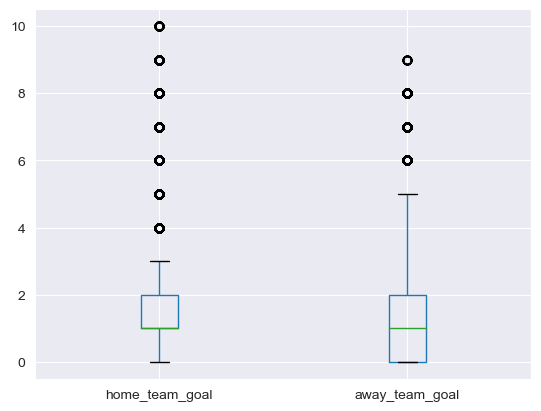

In [96]:
# Checking the distribution of the data for teams' goals
df_team_pro_edited.boxplot(column=['home_team_goal', 'away_team_goal']);

### The above graph describes the previous statistics of the mean for Home and Away team goals per game over the time period.

### Second, Visualization of Data Analysis

In [97]:
# Filtering by home teams' names and team points to get the teams that had the highest average points
best_points_home = df_team_pro_edited.groupby('home_team_long_name')['home_team_points'].mean()
best_points_home.nlargest(n=5)

home_team_long_name
FC Barcelona      2.661798
FC Porto          2.631933
Real Madrid CF    2.608989
SL Benfica        2.563025
Celtic            2.513055
Name: home_team_points, dtype: float64

In [98]:
# The same for away teams
best_points_away = df_team_pro_edited.groupby('away_team_long_name')['away_team_points'].mean()
best_points_away.nlargest(n=5)

away_team_long_name
FC Barcelona      2.221348
Rangers           2.118388
SL Benfica        2.104202
Real Madrid CF    2.102247
FC Porto          2.094118
Name: away_team_points, dtype: float64

In [99]:
# Getting the teams with the highest average points over the time period
best_points_all = (best_points_home + best_points_away)/2
best_points_all
best_points_all.nlargest(n=5)

home_team_long_name
FC Barcelona      2.441573
FC Porto          2.363025
Real Madrid CF    2.355618
SL Benfica        2.333613
Celtic            2.296271
dtype: float64

In [100]:
# Visualize analyzed data
ind = best_points_all.nlargest(n=5).index
values = best_points_all.nlargest(n=5)

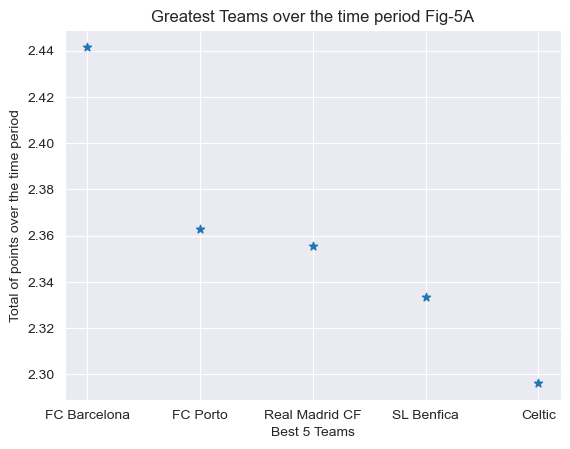

In [101]:
plt.scatter(ind, values, marker='*');
plt.title('Greatest Teams over the time period Fig-5A');
plt.xlabel('Best 5 Teams');
plt.ylabel('Total of points over the time period');

### The above graph shows the Top 5 teams that had the most points over the time period.
> As we observe, The most team that had the most points is FC Barcelona followed by FC Porto and so on.

In [102]:
# Getting home teams with the highest average goals over the period
best_goals_home = df_team_pro_edited.groupby('home_team_long_name')['home_team_goal'].mean()
best_goals_home.nlargest(n=5)

home_team_long_name
Real Madrid CF      3.316854
FC Barcelona        3.258427
FC Bayern Munich    2.810710
PSV                 2.697406
Ajax                2.592219
Name: home_team_goal, dtype: float64

In [103]:
# The same for away teams
best_goals_away = df_team_pro_edited.groupby('away_team_long_name')['away_team_goal'].mean()
best_goals_away.nlargest(n=5)

away_team_long_name
FC Barcelona        2.317978
Real Madrid CF      2.212360
Ajax                2.048991
Celtic              1.993590
FC Bayern Munich    1.990037
Name: away_team_goal, dtype: float64

In [104]:
# Getting the teams with the highest average goals over the time period
best_goals_all = (best_goals_home + best_goals_away)/2
best_goals_all
best_goals_all.nlargest(n=5)

home_team_long_name
FC Barcelona        2.788202
Real Madrid CF      2.764607
FC Bayern Munich    2.400374
PSV                 2.325648
Ajax                2.320605
dtype: float64

In [105]:
# Visualize analyzed data
ind = best_goals_all.nlargest(n=5).index
values = best_goals_all.nlargest(n=5)

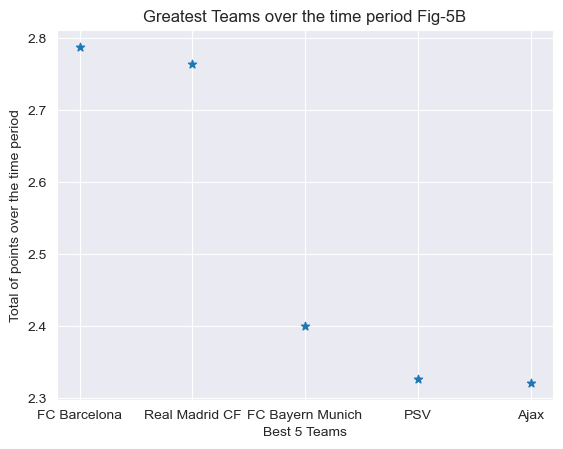

In [106]:
plt.scatter(ind, values, marker='*');
plt.title('Greatest Teams over the time period Fig-5B');
plt.xlabel('Best 5 Teams');
plt.ylabel('Total of points over the time period');


### The above graph shows the Top 5 teams that had the most goals over the time period.
> As we observe, The most team that had the most goals is FC Barcelona followed by Real Madrid CF and so on.

<a id='conclusions'></a>
## Conclusions

<br> The European Soccer datasets are massive one, They included data related to **European** **Leagues**, **Players**, **Teams**, **Matches**, and **Players'** and **Teams' Attributes**.
<br> I've asked a few fan questions that might help data analysts specialize in this field from my point of view, but of course, there's a lot that hasn't come up yet.
<br> Observing and looking at the whole view, now we have an answer to every question we've asked.

 <br><li>**What is the effect of playing home over away games?**
 <br>Observing fig 1....The percentage of  home victories is about <u>**61.5%**</u> ,  It's a percentage not to be underestimated.
    
  It's a percentage not to be underestimated. 
 <br><li>**What is the most leagues scoring goals over the time period?**
 <br>Observing fig 2....In first place is the <u>**Spain Liga BBVA**</u>, followed by the <u>**England Premier League**</u>, followed by the <u>**Italy Serie A**</u>, and the other Leagues according to the figure.
     
| | League Name  | Total Goals    |
|---:|:-------------|:-----------|
| 1 | Spain LIGA BBVA| 8412       |
| 2 | England Premier League| 8240   |
| 3 | Italy Serie A| 7895| 
| 4 | Netherlands Eredivisie| 7542    | 
| 5 | France Ligue 1| 7427  |                 
| 6 | Germany 1. Bundesliga| 7103  |  
| 7 | Portugal Liga ZON Sagres| 5201  |  
| 8 | Belgium Jupiler League| 4841 |  
| 9 | Scotland Premier League| 4804 | 
| 10 | Poland Ekstraklasa| 4656 | 
| 11 | Switzerland Super League| 4166 |   
    
 <br><li>**What are the top ten players with the best ranking over the time period?**
 <br>Observing fig 3....the Top 10 Players based on average ratings from 2008 to 2016 
     
| | Player Name  | BirthDay    |Avg Rating|
|---:|:-------------|:-----------|:-----------|
| 1 | Lionel Messi|  1987-06-24    | 92.192308  |
| 2 | Cristiano Ronaldo| 1985-02-05 | 91.280000  |
| 3 | Franck Ribery| 1983-04-07   |  88.458333 |
| 4 | Andres Iniesta|  1984-05-11 | 88.320000  |
| 5 | Zlatan Ibrahimovic|1981-10-03   | 88.285714  |   
| 6 | Arjen Robben|   1984-01-23  |  87.840000 |
| 7 | Xavi Hernandez|  1980-01-25 |  87.636364 |
| 8 | Wayne Rooney|   1985-10-24   | 87.222222  |
| 9 | Iker Casillas|1981-05-20 | 86.954545  |
| 10 | Philipp Lahm|   1983-11-11  | 86.733333  |
       
 <br><li>**What are the most common attributes of the players with the best ranking over the time period?**
 <br>Observing fig 4....knowing the most common attributes of the Top 10 Players would be useful to improve these attributes for other Players, Herein table in order of average of these attributes for top ten players
     
| | Attributes Name  | Total Avg    |
|---:|:-------------|:-----------|
| 1 | potential |   81.503831   |
| 2 | ball_control | 78.620690  |
| 3 | short_passing | 76.963602  |
| 4 | dribbling | 75.630268  | 
| 5 | acceleration | 75.568966   |                 
| 6 | shot_power | 75.036398  |  
| 7 | reactions |  74.628352 |  
| 8 | sprint_speed | 74.340996  |  
| 9 | stamina | 72.720307  | 
| 10 |strength |  72.076628 | 
| 11 |long_passing| 71.783525  |  
| 12 |  long_shots| 70.013410  |
| 13 |  aggression| 69.747126  |
| 14|  crossing| 68.687739  |
| 15| penalties | 68.565134 | 
| 16| positioning | 68.174330  |                 
| 17|  free_kick_accuracy|  65.913793 |  
| 18|  finishing| 63.762452  |  
| 19| heading_accuracy | 62.877395  |  
| 20| interceptions | 60.597701  | 
| 21 | standing_tackle | 58.492337  | 
| 22 |marking|  51.923372 |  
    
 <br><li>**What are the best teams over the time period?**
 <br>Observing fig 5....The best teams are the higher points with higher scoring goals during the period.
 <br>No doubt the points that you've gotten and the goals you've scored are the best way to introduce the quality of the team
 <br>Herein a table for the best teams with high goals and one for high points
     
| | Team Name  | Avr Goals    |  Team Name   | Avr Points     |                                               
|---:|:-------------|:-----------|:-----------|:-----------|   
| 1 | FC Barcelona| 2.788202 | FC Barcelona | 2.441573 |       
| 2 | Real Madrid CF| 2.764607 |  FC Porto | 2.363025 |        
| 3 | FC Bayern Munich | 2.400374  |Real Madrid CF| 2.355618 |  
| 4 | PSV | 2.325648 | SL Benfica | 2.333613 |       
| 5 | Ajax | 2.320605 | Celtic | 2.296271 |           
        
 
     
         
      
    
                 
                

     
           
          
    
        
            

## There were limitations of databases that obstacle the data analysis process.
#### For example:

<br>1- There are unsuitable numbers of used files that contain similar data, those files are merged by using pandas to reduce the number of used files and to prevent existing the same data in more than a file.
><br><li> The Player data file and the player's attributes data file are merged together.
<br><li> The Team data file and the team's attributes data file are merged together.
<br><li> The Country data file, match data file and the league data file are merged togehter.
    
<br>2- There are unsuitable names and duplicated names for columns' labels of used files. Those labels are renamed to a suitable one.
><br><li> The country's label in the country file is renamed -from (name label) to (country label)- to avoid repeating the names of the columns in the data frame
 
<br>3- Because the data were merged to reduce the number of files, some unnecessary columns appeared in the data analysis and were removed.
><br><li> Unnecessary columns of the Team Data file are dropped.
 <br><li> Unnecessary columns of the Player Data file are dropped.
 <br><li> Unnecessary columns of the League Data file are dropped.
   
<br>4- There are duplicate values in the data frame that must be worked out and erased, otherwise, they will give real results when analyzing the data.
><br><li> Duplicated data in Team data file are removed.
    
<br>5- The Null values or zero values if they are not manipulated, It produces undesired results.
><br><li> Missing values in Team Data are dropped.    
 <br><li> Missing values in Player Data are dropped.    
 <br><li> Missing values in League Data are dropped.    

## Note :

#### During the journey to analyze the data of European Soccer Leagues, I imagined that there were some features related to the fans' interaction with the game such as the number of attendees in important matches and tournaments
#### What about the number of team tournaments during this period, the number of tournaments is a more realistic indicator than the most points and goals scored when analyzing the best teams during this period

## Herein is a list of websites I usually use to find a new method or to reinforce the studied methods in my mind

<a href="https://stackoverflow.com/">stackoverflow.com</a>
<br><a href="https://www.kaggle.com/">kaggle.com</a>
<br><a href="https://www.geeksforgeeks.org/">geeksforgeeks.org</a>
<br><a href="https://github.com/">github.com</a>
<br><a href="https://www.w3schools.com/">w3schools.com</a>
<br><a href="https://www.w3resource.com/">w3resource.com</a>
